# Exploratory data analysis and working with texts

In this notebook, we learn about:
1. descriptive statistics to explore data;
2. working with texts

# Part 1: descriptive statistics

*"The goal of exploratory data analysis is to develop an understanding of your data. EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large quantity of questions."* 

Key questions:
* Which kind of variation occurs within variables?
* Which kind of co-variation occurs between variables?

https://r4ds.had.co.nz/exploratory-data-analysis.html

In [1]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset
Let us import the Venetian apprenticeship contracts dataset in memory.

In [2]:
root_folder = "../data/apprenticeship_venice/"
df_contracts = pd.read_csv(codecs.open(os.path.join(root_folder,"professions_data.csv"), encoding="utf8"), sep=";")
df_professions = pd.read_csv(codecs.open(os.path.join(root_folder,"professions_classification.csv"), encoding="utf8"), sep=",")

Let's take another look to the dataset.

In [3]:
df_contracts.head(5)

,page_title,register,annual_salary,a_profession,profession_code_strict,profession_code_gen,profession_cat,corporation,keep_profession_a,complete_profession_a,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
0,Carlo Della sosta (Orese) 1592-08-03,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,orese,orese,orefice,orefice,Oresi,1,1,...,1,1,1,0,0,0,0,0,NaN,0
1,Antonio quondam Andrea (squerariol) 1583-01-09,"asv, giustizia vecchia, accordi dei garzoni, 1...",12.5,squerariol,squerariol,lavori allo squero,lavori allo squero,Squerarioli,1,1,...,0,0,1,0,0,0,1,0,1.0,0
2,Cristofollo di Zuane (batioro in carta) 1591-0...,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,batioro,batioro,battioro,fabbricatore di foglie/fili/cordelle d'oro o a...,Battioro,1,1,...,0,0,0,0,0,0,0,0,NaN,0
3,Illeggibile (marzer) 1584-06-21,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,0,0,0,0,0,0,NaN,0
4,Domenico Morebetti (spechier) 1664-09-13,"asv, giustizia vecchia, accordi dei garzoni, 1...",7.0,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,1,0,0,0,1,0,1.0,0


In [4]:
df_contracts.columns

Index(['page_title', 'register', 'annual_salary', 'a_profession',
       'profession_code_strict', 'profession_code_gen', 'profession_cat',
       'corporation', 'keep_profession_a', 'complete_profession_a',
       'enrolmentY', 'enrolmentM', 'startY', 'startM', 'length', 'has_fled',
       'm_profession', 'm_profession_code_strict', 'm_profession_code_gen',
       'm_profession_cat', 'm_corporation', 'keep_profession_m',
       'complete_profession_m', 'm_gender', 'm_name', 'm_surname',
       'm_patronimic', 'm_atelier', 'm_coords', 'a_name', 'a_age', 'a_gender',
       'a_geo_origins', 'a_geo_origins_std', 'a_coords', 'a_quondam',
       'accommodation_master', 'personal_care_master', 'clothes_master',
       'generic_expenses_master', 'salary_in_kind_master',
       'pledge_goods_master', 'pledge_money_master', 'salary_master',
       'female_guarantor', 'period_cat', 'incremental_salary'],
      dtype='object')

Every row represents an apprenticeship contract. Contracts were registered both at the guild's and at a public office. This is a sample of contracts from a much larger set of records.

Some of the variables we will work with are:
* `annual_salary`: the annual salary paid to the apprencice, if any (in Venetian ducats).
* `a_profession` to `corporation`: increasingly generic classifications for the apprentice's stated profession.
* `startY` and `enrolmentY`: contract start and registration year respectively.
* `length`: of the contract, in years.
* `m_gender` and `a_gender`: of master and apprentice respectively.
* `a_age`: age of the apprentice at entry, in years.
* `female_guarantor`: if at least one of the contract's guarantors was female, boolean.

In [8]:
df_professions.head(3)

,Trascrizione,Standard,Gruppo 0,Gruppo 1,Gruppo 2,Gruppo 3,Gruppo 4,Corporazione
0,al negotio del libraro,librer,libraio,librai - diverse specializzazioni,stampa,altre lavorazioni manifatturiere,beni,"libreri, stampatori e ligadori"
1,arte de far arpicordi,arte de far arpicordi,fabbricatore di arpicordi,fabbricatore di strumenti musicali,musica,altri servizi,servizi,NaN
2,arte de' colori,arte dei colori,fabbricazione/vendita di colori,colori,colori,decorazioni e mestieri dell'arte,beni,spezieri


The professions data frame contains a classification system for each profession as found in the records (transcription, first column). The last column is the guild (or corporation) which governed the given profession. This work was performed manually by historians. We don't use it here as the classifications we need are already part of the main dataframe.

### Questions

* Plot the distribution (histogram) of the apprentices' age, contract length, annual salary and start year.
* Calculate the proportion of female apprentices and masters, and of contracts with a female guarantor.
* How likely it is for a female apprentice to have a female master? And for a male apprentice?

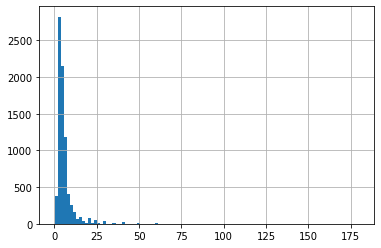

In [9]:
df_contracts.annual_salary.hist(bins=100)

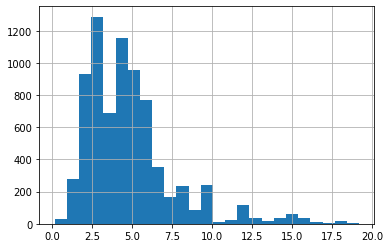

In [10]:
df_contracts[df_contracts.annual_salary < 20].annual_salary.hist(bins=25)

In [11]:
df_contracts.a_gender.sum()/df_contracts.shape[0]

0.9738941261783901

In [9]:
df_contracts.m_gender.sum()/df_contracts.shape[0]

0.976276805138299

In [10]:
df_contracts[df_contracts.a_gender == 0].m_gender.sum()/df_contracts[df_contracts.a_gender == 0].shape[0]

0.7272727272727273

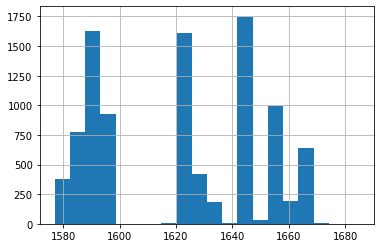

In [13]:
df_contracts.startY.hist(bins=20)

## Looking at empirical distributions

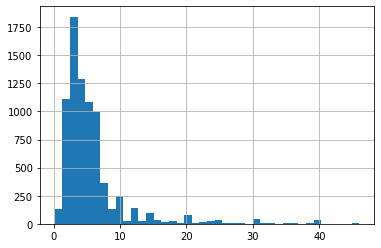

In [14]:
df_contracts[df_contracts.annual_salary < 50].annual_salary.hist(bins=40)

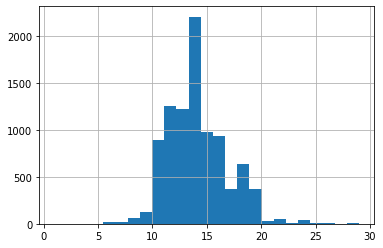

In [15]:
df_contracts[df_contracts.a_age < 30].a_age.hist(bins=25)

### Two very important distributions

#### Normal

Also known as Gaussian, is a bell-shaped distribution with mass around the mean and exponentially decaying on the sides. It is fully characterized by the mean (center of mass) and standard deviation (spread).

https://en.wikipedia.org/wiki/Normal_distribution

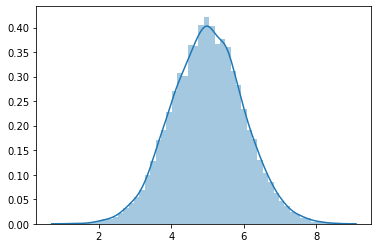

In [16]:
s1 = np.random.normal(5, 1, 10000)
sns.distplot(s1)

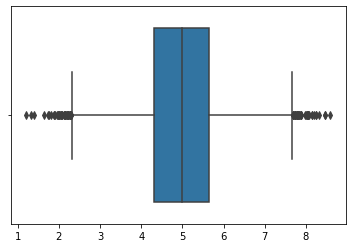

In [18]:
# for boxplots see https://en.wikipedia.org/wiki/Interquartile_range (or ask!)
sns.boxplot(s1)

#### Heavy-tailed
Distributions with a small but non-negligible amount of observations with high values. Several probability distributions follow this pattern: https://en.wikipedia.org/wiki/Heavy-tailed_distribution#Common_heavy-tailed_distributions.

We pick the lognormal here: https://en.wikipedia.org/wiki/Log-normal_distribution

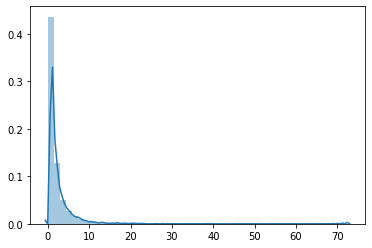

In [19]:
s2 = np.random.lognormal(0, 1.2, 10000)
sns.distplot(s2)

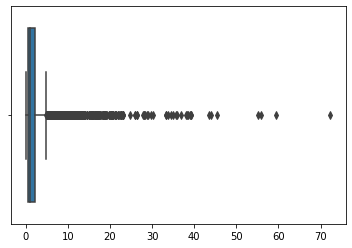

In [20]:
sns.boxplot(s2)

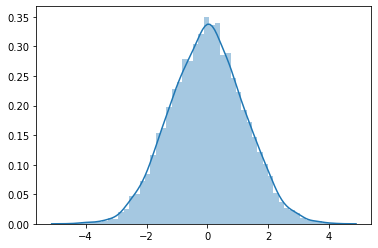

In [23]:
# Why "lognormal"?

sns.distplot(np.log(s2))

#### Box plots

<img src="figures/eda-boxplot.png" width="800px" heigth="800px">

### Outliers, missing values

An *outlier* is an observation far from the center of mass of the distribution. It might be an error or a genuine observation: this distinction requires domain knowledge. Outliers infuence the outcomes of several statistics and machine learning methods: it is important to decide how to deal with them.

A *missing value* is an observation without a value. There can be many reasons for a missing value: the value might not exist (hence its absence is informative and it should be left empty) or might not be known (hence the value is existing but missing in the dataset and it should be marked as NA).

*One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.*

## Summary statistics
A statistic is a measure over a distribution, and it is said to be *robust* if not sensitive to outliers.

* Not robust: min, max, mean, standard deviation.
* Robust: mode, median, other quartiles.

A closer look at the mean:

$\bar{x} = \frac{1}{n} \sum_{i}x_i$

And variance (the standard deviation is the square root of the variance):

$Var(x) = \frac{1}{n} \sum_{i}(x_i - \bar{x})^2$

<img src="figures/2560px-Comparison_mean_median_mode.svg.png" width="400px" heigth="400px">

In [25]:
# Not robust: min, max, mean, mode, standard deviation

print(np.mean(s1)) # should be 5
print(np.mean(s2))

4.997110736085408
2.0285577736193408


In [26]:
# Robust: median, other quartiles

print(np.quantile(s1, 0.5)) # should coincide with mean and mode
print(np.quantile(s2, 0.5))

5.001700749001927
0.9968430234567824


#### Questions

* Calculate the min, max, mode and sd.
* Calculate the 90% quantile values.
* Consider our normally distributed data in s1. Add an outlier (e.g., value 100). What happens to the mean and mode? Write down your answer and then check.

In [27]:
# Let's explore our dataset
df_contracts.describe()

,annual_salary,keep_profession_a,complete_profession_a,enrolmentY,enrolmentM,startY,startM,length,has_fled,keep_profession_m,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
count,7870.000000,9653.000000,9653.000000,9628.000000,9631.000000,9533.000000,9539.000000,9645.000000,9653.000000,9653.000000,...,9653.000000,9653.000000,9653.000000,9653.000000,9653.0,9653.0,9653.000000,9653.000000,7891.000000,9653.000000
mean,5.916921,0.996167,0.993681,1621.490133,6.550202,1621.369768,6.494706,5.005694,0.105356,0.985497,...,0.733347,0.155289,0.784005,0.002693,0.0,0.0,0.804102,0.057391,0.909390,0.027556
std,6.985214,0.061796,0.079246,27.685452,3.343962,27.654839,3.363404,1.462343,0.307027,0.119559,...,0.442232,0.362198,0.411532,0.051831,0.0,0.0,0.396911,0.232601,0.287071,0.163706
min,0.166667,0.000000,0.000000,1582.000000,1.000000,1577.000000,1.000000,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1592.000000,4.000000,1592.000000,4.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1622.000000,6.000000,1622.000000,6.000000,5.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
75%,6.000000,1.000000,1.000000,1645.000000,9.000000,1645.000000,9.000000,6.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
max,180.000000,1.000000,1.000000,1685.000000,12.000000,1685.000000,12.000000,15.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


## Relating two variables

#### Covariance

Measure of joint linear variability of two variables:

<img src="figures/covariance.png" width="400px" heigth="400px">

Its normalized version is called the (Pearson's) correlation coefficient:

<img src="figures/pearson.png" width="400px" heigth="400px">

Correlation is helpful to spot possible relations, but is of tricky interpretation and is not exhaustive:

<img src="figures/800px-Correlation_examples2.svg.png" width="700px" heigth="&00px">

See: https://en.wikipedia.org/wiki/Covariance and https://en.wikipedia.org/wiki/Pearson_correlation_coefficient.

*Note: correlation is not causation!*

In [28]:
df_contracts[["annual_salary","a_age","length"]].corr()

,annual_salary,a_age,length
annual_salary,1.000000,0.205404,-0.361611
a_age,0.205404,1.000000,-0.430062
length,-0.361611,-0.430062,1.000000


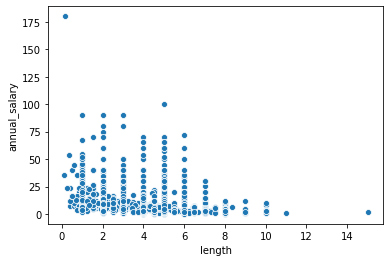

In [29]:
sns.scatterplot(df_contracts.length,df_contracts.annual_salary)

#### Questions

* Try to explore the correlation of other variables in the dataset.
* Can you think of a possible motivation for the trend we see: older apprentices with a shorter contract getting on average a higher annual salary?

## Sampling and uncertainty (mention)

Often, we work with samples and we want the sample to be representative of the population it is taken from, in order to draw conclusions that generalise from the sample to the full population.

Sampling is *tricky*. Samples have *variance* (variation between samples from the same population) and *bias* (systematic variation from the population).

# Part 2: working with texts

Let's get some basics (or a refresher) of working with texts in Python. Texts are sequences of discrete symbols (words or, more generically, tokens).

Key challenge: representing text for further processing. Two mainstream approaches:
* *Bag of words*: a text is a collection of tokens occurring with a certain frequence and assumed independently from each other within the text. The mapping from texts to features is determinsitic and straighforward, each text is represented as a vector of the size of the vocabulary.
* *Embeddings*: a method is used (typically, neural networks), to learn a mapping from each token to a (usually small) vector representing it. A text can be represented in turn as an aggregation of these embeddings.

## Import the dataset
Let us import the Elon Musk's tweets dataset in memory.

<img src="figures/elon_loop.jpeg" width="400px" heigth="400px">

In [30]:
root_folder = "../data/musk_tweets"
df_elon = pd.read_csv(codecs.open(os.path.join(root_folder,"elonmusk_tweets.csv"), encoding="utf8"), sep=",")
df_elon['text'] = df_elon['text'].str[1:]

In [31]:
df_elon.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac..."
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g..."


In [32]:
df_elon.shape

(2819, 3)

## Natural Language Processing in Python

In [33]:
# import some of the most popular libraries for NLP in Python
import spacy
import nltk
import string
import sklearn

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

A typical NLP pipeline might look like the following:
    
<img src="figures/spacy_pipeline.png" width="600px" heigth="600px">

### Tokenization: splitting a text into constituent tokens.

In [38]:
from nltk.tokenize import TweetTokenizer, word_tokenize
tknzr = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

In [39]:
example_tweet = df_elon.text[1]
print(example_tweet)

"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"


In [40]:
tkz1 = tknzr.tokenize(example_tweet)
print(tkz1)
tkz2 = word_tokenize(example_tweet)
print(tkz2)

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']
['``', '@', 'ForIn2020', '@', 'waltmossberg', '@', 'mims', '@', 'defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', 'that', "'s", 'irr\\xe2\\x80\\xa6', 'https', ':', '//t.co/qQcTqkzgMl', "''"]


Question: can you spot what the Twitter tokenizer is doing instead of a standard one?

In [41]:
# some more pre-processing

def filter(tweet):
    
    # remove punctuation and short words and urls
    tweet = [t for t in tweet if t not in string.punctuation and len(t) > 3 and not t.startswith("http")]
    return tweet

def tokenize_and_string(tweet):
    
    tkz = tknzr.tokenize(tweet)
    
    tkz = filter(tkz)
    
    return " ".join(tkz)

In [42]:
print(tkz1)
print(filter(tkz1))

['"', '@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', '.', 'Tesla', 'is', 'absurdly', 'overvalued', 'if', 'based', 'on', 'the', 'past', ',', 'but', "that's", 'irr', '\\', 'xe2', '\\', 'x80', '\\', 'xa6', 'https://t.co/qQcTqkzgMl', '"']
['@ForIn2020', '@waltmossberg', '@mims', '@defcon_5', 'Exactly', 'Tesla', 'absurdly', 'overvalued', 'based', 'past', "that's"]


In [43]:
df_elon["clean_text"] = df_elon["text"].apply(tokenize_and_string)

In [44]:
df_elon.head(5)

,id,created_at,text,clean_text
0,849636868052275200,2017-04-05 14:56:29,'And so the robots spared humanity ... https:/...,robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,"""@ForIn2020 @waltmossberg @mims @defcon_5 Exac...",@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"'@waltmossberg @mims @defcon_5 Et tu, Walt?'",@waltmossberg @mims @defcon_5 Walt
3,848935705057280001,2017-04-03 16:30:19,'Stormy weather in Shortville ...',Stormy weather Shortville
4,848416049573658624,2017-04-02 06:05:23,"""@DaveLeeBBC @verge Coal is dying due to nat g...",@DaveLeeBBC @verge Coal dying fracking It's ba...


In [45]:
# save cleaned up version

df_elon.to_csv(os.path.join(root_folder,"df_elon.csv"), index=False)

### Building a dictionary

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=False, tokenizer=tknzr.tokenize)
X_count = count_vect.fit_transform(df_elon.clean_text)
X_count.shape

(2819, 7864)

In [47]:
word_list = count_vect.get_feature_names()  
count_list = X_count.toarray().sum(axis=0)
dictionary = dict(zip(word_list,count_list))
count_vect.vocabulary_.get("robots")

6617

In [48]:
X_count[:,count_vect.vocabulary_.get("robots")].toarray().sum()

3

In [49]:
dictionary["robots"]

3

#### Questions

* Find the tokens most used by Elon.
* Find the twitter users most referred to by Elon (hint: use the @ handler to spot them).

In [50]:
dictionary_list = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list][:10]

[('Tesla', 322),
 ('Model', 236),
 ('that', 223),
 ('will', 218),
 ('with', 177),
 ('@SpaceX', 169),
 ('from', 163),
 ('this', 159),
 ('@TeslaMotors', 149),
 ('launch', 124)]

In [51]:
dictionary_list_users = sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
[d for d in dictionary_list if d[0].startswith('@')][:10]

[('@SpaceX', 169),
 ('@TeslaMotors', 149),
 ('@elonmusk', 85),
 ('@NASA', 48),
 ('@Space_Station', 19),
 ('@FredericLambert', 17),
 ('@ID_AA_Carmack', 15),
 ('@WIRED', 14),
 ('@vicentes', 14),
 ('@BadAstronomer', 11)]

### Representing tweets as vectors

Texts are of variable length and need to be represented numerically in some way. Most typically, we represent them as *equally-sized vectors*.

Actually, this is what we have already done! Let's take a closer look at `X_count` above..

In [52]:
# This is the first Tweet of the data frame

df_elon.loc[0]

id                                           849636868052275200
created_at                                  2017-04-05 14:56:29
text          'And so the robots spared humanity ... https:/...
clean_text                               robots spared humanity
Name: 0, dtype: object

In [53]:
# let's get the vector representation for this Tweet

vector_representation = X_count[0,:]

In [54]:
# there are 3 positions not to zero, as we would expect: the vector contains 1 in the columns related to the 3 words that make up the Tweet. 
# It would contain a number higher than 1 if a given word were occurring multiple times.

np.sum(vector_representation)

3

In [56]:
# Let's check that indeed the vector contains 1s for the right words
# Remember, the vector has shape (1 x size of the vocabulary)

print(vector_representation[0,count_vect.vocabulary_.get("robots")])
print(vector_representation[0,count_vect.vocabulary_.get("spared")])
print(vector_representation[0,count_vect.vocabulary_.get("humanity")])

1
1
1


### Term Frequency - Inverse Document Frequency
We can use boolean counts (1/0) and raw counts (as we did before) to represent a Tweet over the space of the vocabulary, but there exist improvements on this basic idea. For example, the TF-IDF weighting scheme:

$tfidf(t, d, D) = tf(t, d) \cdot idf(t, D)$

$tf(t, d) = f_{t,d}$

$idf(t, D) = log \Big( \frac{|D|}{|{d \in D: t \in d}|} \Big)$

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(lowercase=False, tokenizer=tknzr.tokenize)
X_count_tfidf = count_vect.fit_transform(df_elon.clean_text)
X_count_tfidf.shape

(2819, 7864)

In [58]:
X_count_tfidf[0,:].sum()

1.7226760995112569

In [59]:
X_count[0,:].sum()

3

#### Sparse vectors (mention)
How is Python representing these vectors in memory? Most of their cells are set to zero. 

We call any vector or matrix whose cells are mostly to zero *sparse*.
There are efficient ways to store them in memory.

In [60]:
X_count_tfidf[0,:]

<1x7864 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

### Spacy pipelines

Useful to construct sequences of pre-processing steps: https://spacy.io/usage/processing-pipelines.

In [61]:
# Install the required model

!python -m spacy download en_core_web_sm

     |████████████████████████████████| 11.1MB 1.8MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-zgs6r6f6/wheels/39/ea/3b/507f7df78be8631a7a3d7090962194cf55bc1158572c0be77f
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [66]:
# without this line spacy is not able to find the downloaded model

! python -m spacy link --force en_core_web_sm en_core_web_sm

✔ Linking successful
/srv/conda/envs/notebook/lib/python3.7/site-packages/en_core_web_sm -->
/srv/conda/envs/notebook/lib/python3.7/site-packages/spacy/data/en_core_web_sm
You can now load the model via spacy.load('en_core_web_sm')


In [67]:
# Load a pre-trained pipeline (Web Small): https://spacy.io/usage/models

#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

*.. the model’s meta.json tells spaCy to use the language "en" and the pipeline ["tagger", "parser", "ner"]. spaCy will then initialize spacy.lang.en.English, and create each pipeline component and add it to the processing pipeline. It’ll then load in the model’s data from its data directory and return the modified Language class for you to use as the nlp object.*

Let's create a simple pipeline that does **lemmatization**, **part of speech tagging** and **named entity recognition** using spaCy models.

*If you don't know what these NLP tasks are, please ask!*

In [68]:
tweet_pos = list()
tweet_ner = list()
tweet_lemmas = list()

for tweet in df_elon.text.values:
    spacy_tweet = nlp(tweet)
    
    local_tweet_pos = list()
    local_tweet_ner = list()
    local_tweet_lemmas = list()
    
    for sentence in list(spacy_tweet.sents):
        # --- lemmatization, remove punctuation and stop wors
        local_tweet_lemmas.extend([token.lemma_ for token in sentence if not token.is_punct | token.is_stop])
        local_tweet_pos.extend([token.pos_ for token in sentence if not token.is_punct | token.is_stop])
    for ent in spacy_tweet.ents:
        local_tweet_ner.append(ent)

    tweet_pos.append(local_tweet_pos)
    tweet_ner.append(local_tweet_ner)
    tweet_lemmas.append(local_tweet_lemmas)

In [70]:
tweet_lemmas[0]

['robot', 'spare', 'humanity', 'https://t.co/v7jujqwfcv']

In [71]:
tweet_pos[0]

['NOUN', 'VERB', 'NOUN', 'NUM']

In [72]:
tweet_ner[0]

[]

In [73]:
# but it actually works!

tweet_ner[3]

[Stormy, Shortville]

*Note: we are really just scratching the surface of spaCy, but it is worth knowing it's there.*

### Searching tweets

Once we have represented Tweets as vectors, we can easily find similar ones using basic operations such as filtering.

In [74]:
target = 0
print(df_elon.clean_text[target])

robots spared humanity


In [76]:
condition = X_count_tfidf[target,:] > 0

In [77]:
print(condition)

  (0, 5198)	True
  (0, 6617)	True
  (0, 6949)	True


In [78]:
X_filtered = X_count_tfidf[:,np.ravel(condition.toarray())]

In [79]:
X_filtered

<2819x3 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [80]:
print(X_filtered)

  (0, 0)	0.495283407359234
  (0, 2)	0.6406029997190412
  (0, 1)	0.5867896924329815
  (217, 0)	0.2972381925908634
  (271, 0)	0.3284547085372313
  (464, 0)	0.2273880239746895
  (473, 0)	0.5667220639589731
  (734, 1)	0.3846355279044392
  (940, 0)	0.27312597149485407
  (1004, 0)	0.28161575586607157
  (1550, 1)	0.33303254164524276
  (1862, 0)	0.3196675199194523
  (2493, 0)	0.2685018991334563
  (2559, 0)	0.31145247014227906
  (2565, 0)	0.2645117238497897
  (2661, 0)	0.2729016388865858


In [81]:
from scipy import sparse

sparse.find(X_filtered)

(array([   0,  217,  271,  464,  473,  940, 1004, 1862, 2493, 2559, 2565,
        2661,    0,  734, 1550,    0], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2], dtype=int32),
 array([0.49528341, 0.29723819, 0.32845471, 0.22738802, 0.56672206,
        0.27312597, 0.28161576, 0.31966752, 0.2685019 , 0.31145247,
        0.26451172, 0.27290164, 0.58678969, 0.38463553, 0.33303254,
        0.640603  ]))

In [82]:
tweet_indices = list(sparse.find(X_filtered)[0])

In [83]:
print("TARGET: " + df_elon.clean_text[target])

for n, tweet_index in enumerate(list(set(tweet_indices))):
    if tweet_index != target:
        print(str(n) +")"+ df_elon.clean_text[tweet_index])

TARGET: robots spared humanity
1)@JustBe74 important make humanity proud this case particular duty owed American taxpayer
2)@pud Faith restored humanity French toast money
3)humanity have exciting inspiring future cannot confined Earth forever @love_to_dream #APSpaceChat
4)@ShireeshAgrawal like humanity
5)Creating neural lace thing that really matters humanity achieve symbiosis with machines
6)@tzepr Certainly agree that first foremost triumph humanity cheering good spirit
7)@ReesAndersen @FLIxrisk believe that critical ensure good future humanity
8)@NASA #Mars hard x99s worth risks extend humanity x99s frontier beyond Earth Learn about neighbor planet
9)Astronomer Royal Martin Rees soon will robots take over world @Telegraph
10)@thelogicbox @IanrossWins Mars critical long-term survival humanity life Earth know
11)humanity wishes become multi-planet species then must figure move millions people Mars
12)Sure feels weird find myself defending robots
13)Neil Armstrong hero humanity spirit

#### Questions

* Can you rank the matched tweets using their tf-idf weights, so to put higher weighted tweets first?
* Which limitations do you think a bag of words representation has?
* Can you spot any limitations of this approach based on similarity measures over bag of words representations?